![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Exercises
## Bike store sales

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

In [4]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [4]:
sales['Revenue'].describe()

count    113036.000000
mean        754.370360
std        1309.094674
min           2.000000
25%          63.000000
50%         223.000000
75%         800.000000
max       58074.000000
Name: Revenue, dtype: float64

<Axes: >

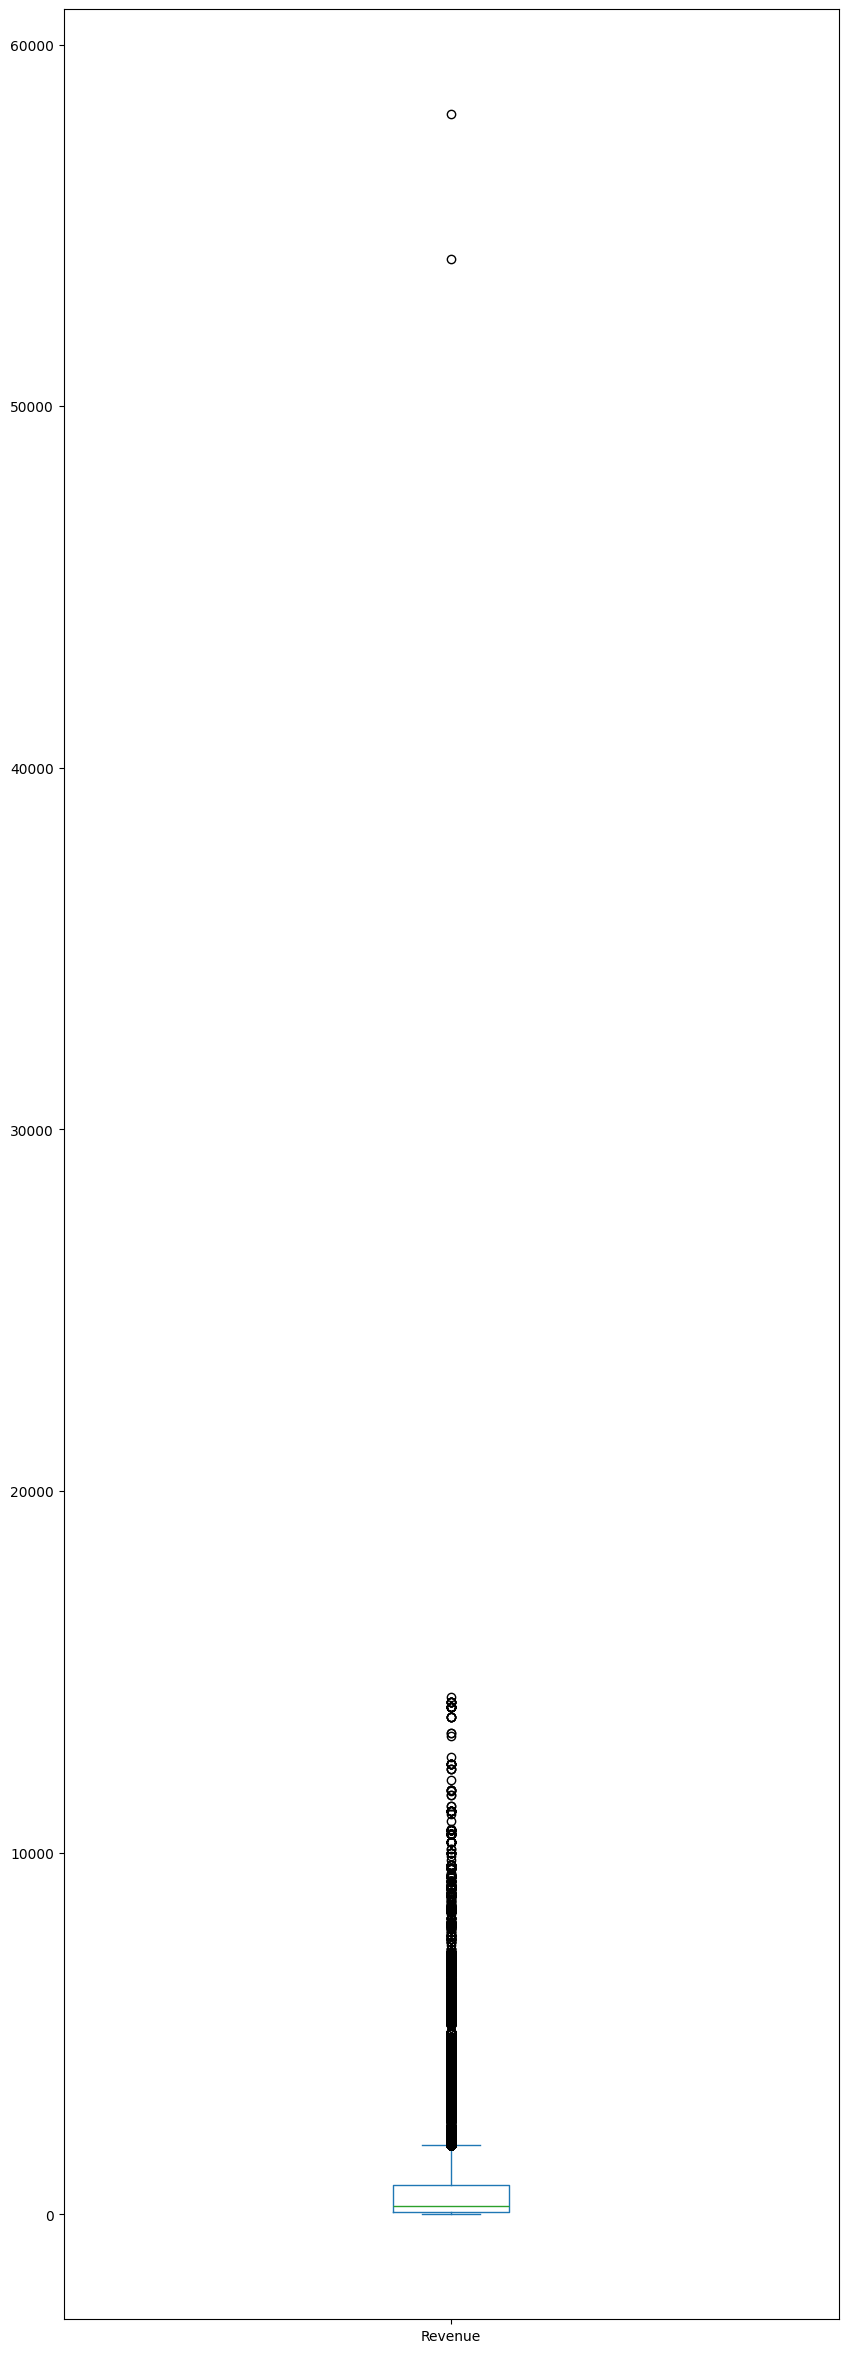

In [ ]:
sales['Revenue'].plot(kind='box', vert=True, figsize=(10,30))


{'whiskers': [<matplotlib.lines.Line2D at 0x23b935b25d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23b935b2350>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b935b2710>],
 'medians': [<matplotlib.lines.Line2D at 0x23b935b2fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b935b2e90>],
 'means': []}

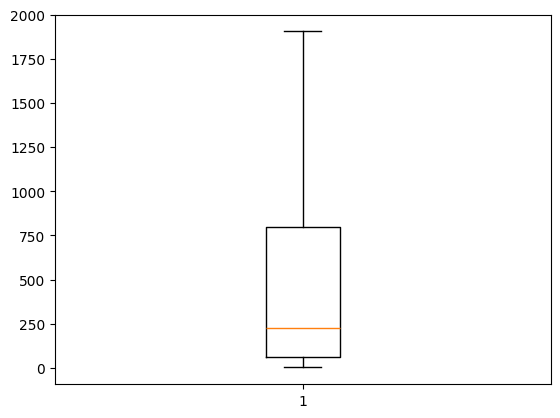

In [20]:
Q1 = sales['Revenue'].quantile(0.25)
Q3 = sales['Revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
sales_no_outliers_trim = sales.loc[
    (sales['Revenue'] >= lower_bound) &
    (sales['Revenue'] <= upper_bound)
]

sales_no_outliers_capped = np.where(
    sales['Revenue'] < lower_bound, lower_bound, np.where(
        sales['Revenue'] > upper_bound, upper_bound, sales['Revenue']))

plt.boxplot(sales_no_outliers_capped, vert=True)

In [29]:
Q1 = sales['Revenue'].quantile(0.25)
Q3 = sales['Revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
sales_no_outliers_trim = sales.loc[
    (sales['Revenue'] >= lower_bound) &
    (sales['Revenue'] <= upper_bound)
]

sales_no_outliers_capped = np.where(
    sales['Revenue'] < lower_bound, lower_bound, np.where(
        sales['Revenue'] > upper_bound, upper_bound, sales['Revenue']))

print(sales['Revenue'].describe())

print(sales_no_outliers_trim['Revenue'].describe())
print(pd.Series(sales_no_outliers_capped).describe())


count    113036.000000
mean        754.370360
std        1309.094674
min           2.000000
25%          63.000000
50%         223.000000
75%         800.000000
max       58074.000000
Name: Revenue, dtype: float64
count    98271.000000
mean       353.686703
std        422.549592
min          2.000000
25%         53.000000
50%        146.000000
75%        541.000000
max       1905.000000
Name: Revenue, dtype: float64
count    113036.000000
mean        556.387819
std         654.747722
min           2.000000
25%          63.000000
50%         223.000000
75%         800.000000
max        1905.500000
dtype: float64


Why don't you try with `.mean()`

In [5]:
sales['Customer_Age'].mean()

np.float64(35.91921157861212)

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

<Axes: title={'center': 'Customer Age Graph'}, ylabel='Density'>

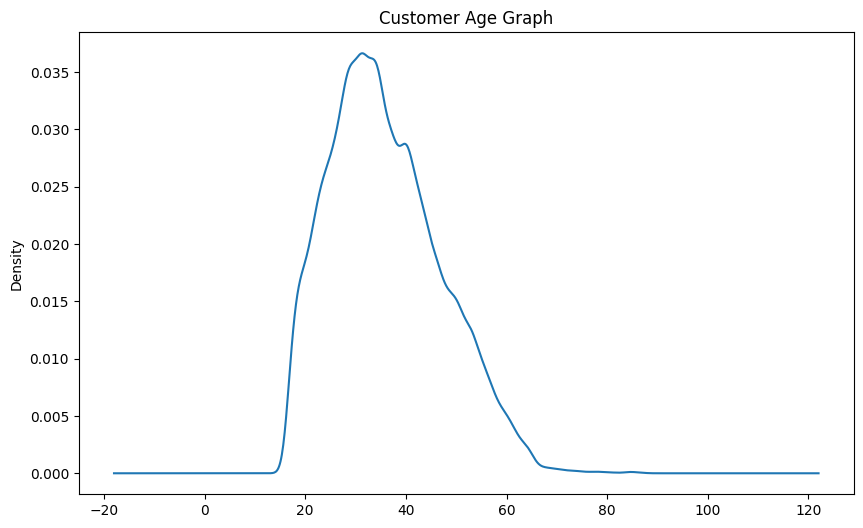

In [6]:
sales['Customer_Age'].plot(kind = 'kde', title = 'Customer Age Graph', xlabel = 'Age', ylabel = 'Density', figsize = (10,6))


<Axes: ylabel='Density'>

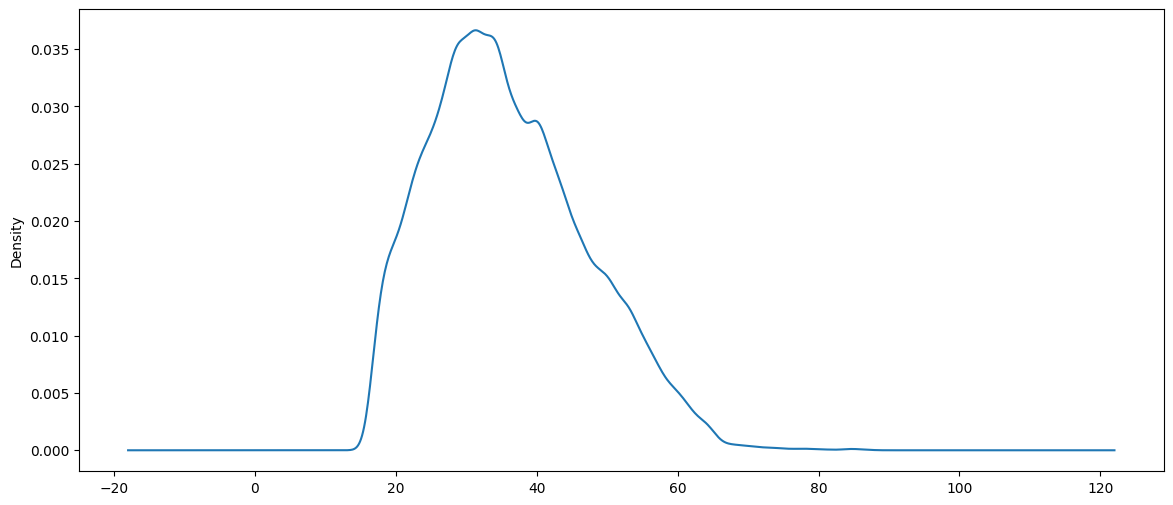

In [7]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

In [ ]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [11]:
sales['Order_Quantity'].count()

np.int64(113036)

In [ ]:
sales['Order_Quantity'].mean()

np.float64(11.901659648253654)

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

Text(0.5, 0, 'Order Quantity')

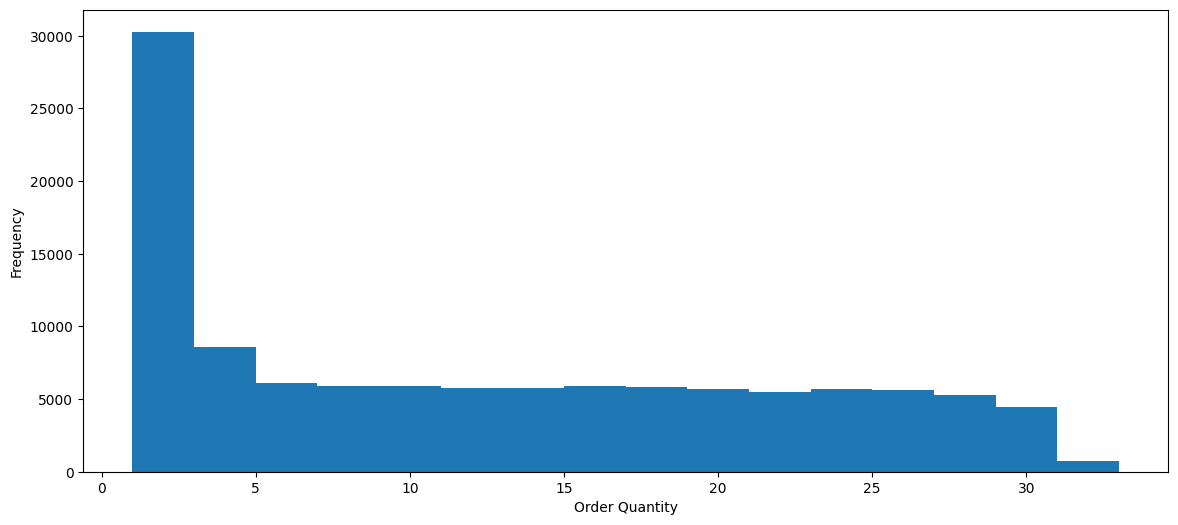

In [22]:
bins = np.arange(sales['Order_Quantity'].min(), sales['Order_Quantity'].max() + 2,2)
sales['Order_Quantity'].sort_values(ascending=True).plot(kind='hist', bins=bins, figsize=(14,6))
plt.xlabel('Order Quantity')

In [ ]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

<Axes: >

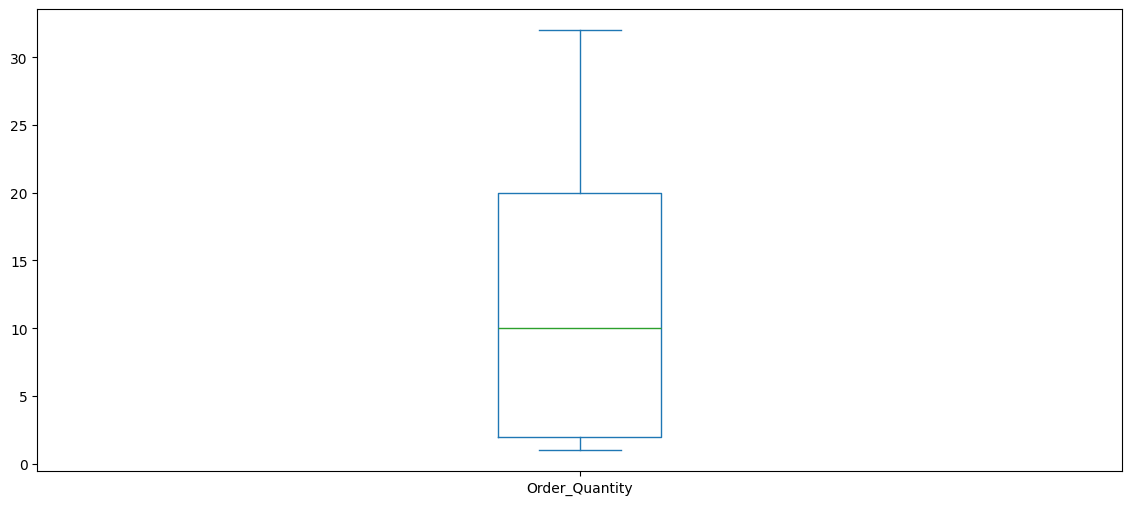

In [24]:
sales['Order_Quantity'].plot(kind='box', vert=True, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

<Axes: xlabel='Year'>

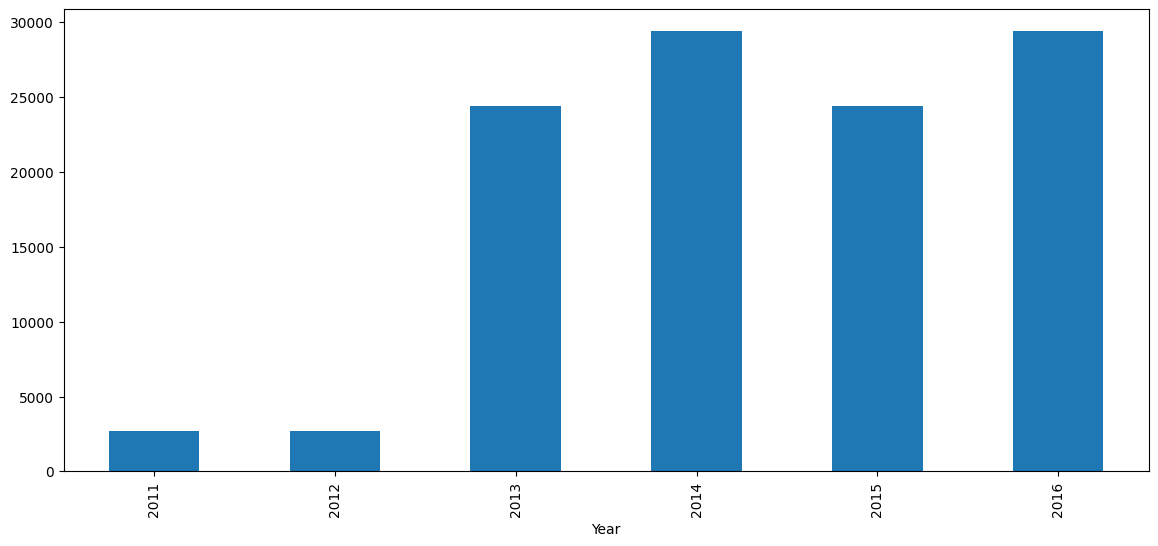

In [5]:
sales['Year'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))

In [ ]:
sales['Year'].value_counts()

Go ahead and show a <b>pie plot</b> with the previous data:

Text(0, 0.5, 'Cee')

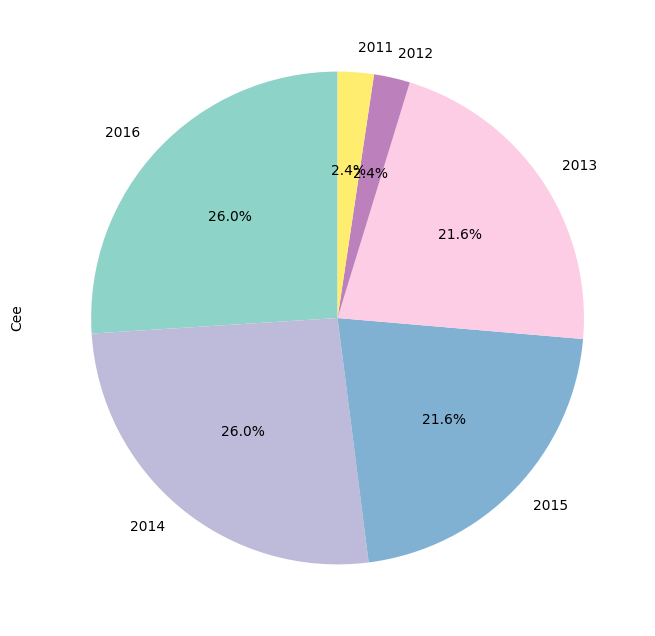

In [5]:
sales['Year'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', startangle=90, cmap='Set3')

plt.ylabel('Cee')

In [ ]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per month do we have?

In [6]:
sales['Month'].value_counts()

Month
June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: count, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

In [ ]:
# your code goes here


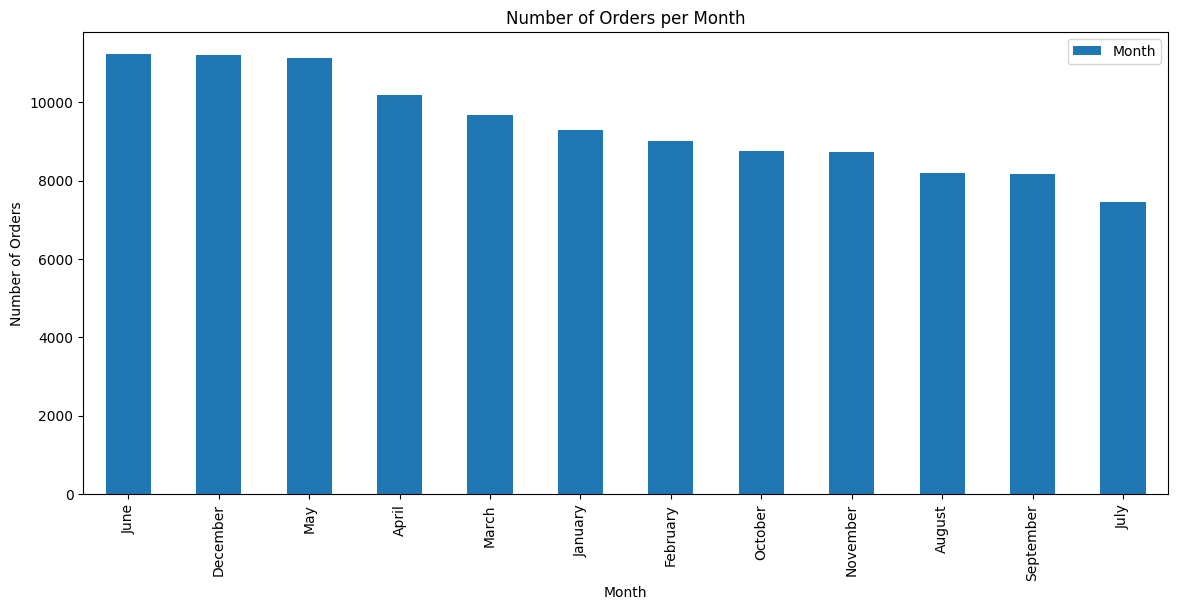

In [11]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

plt.title("Number of Orders per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.legend(['Month'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [13]:
sales["Country"].value_counts().head()

Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
Name: count, dtype: int64

In [12]:
sales['Country'].value_counts().head(1)

Country
United States    39206
Name: count, dtype: int64

In [ ]:
sales['Country'].value_counts()

Go ahead and show a <b>bar plot</b> of the sales per country:

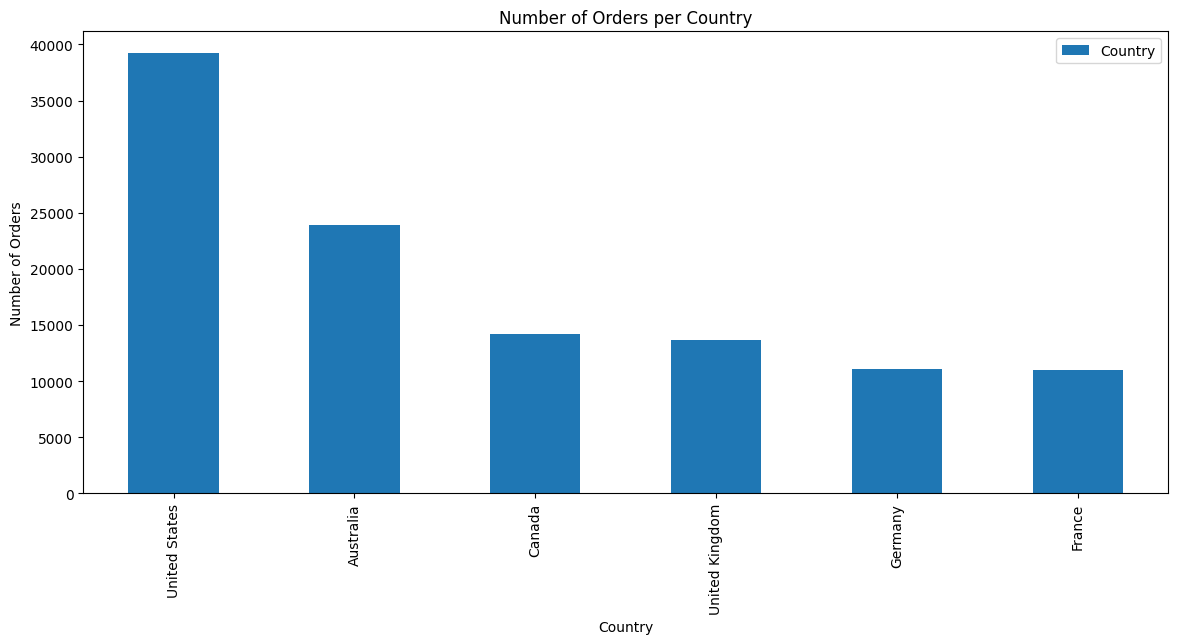

In [14]:
sales["Country"].value_counts().plot(kind='bar', figsize=(14,6))

plt.title("Number of Orders per Country")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.legend(['Country'])

<Axes: xlabel='Country'>

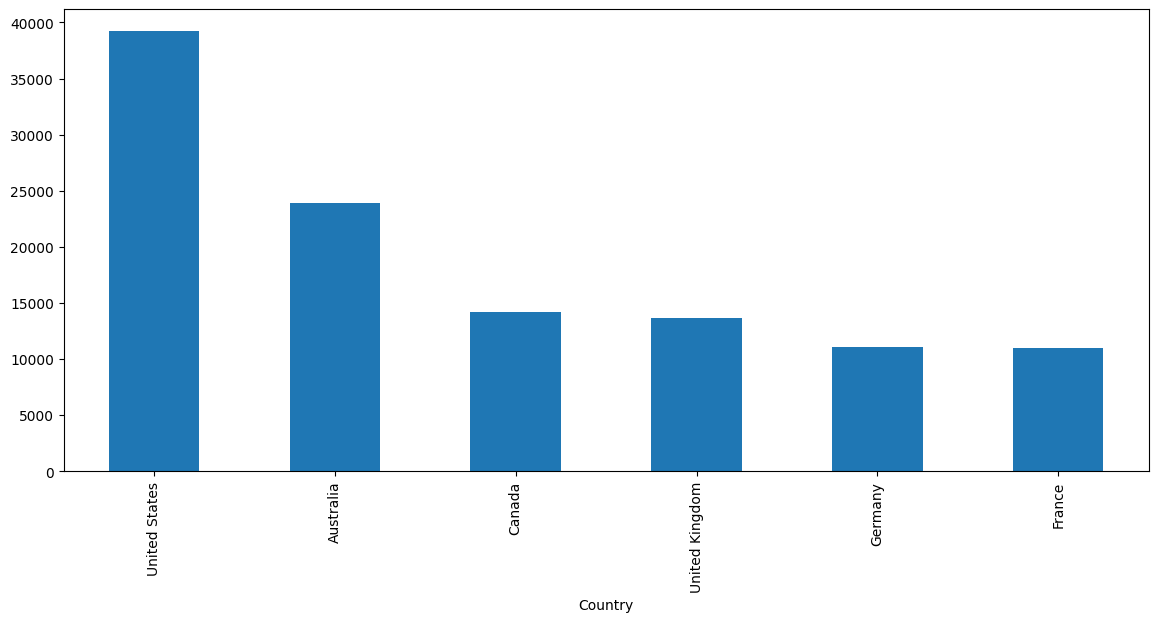

In [15]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a list of every product sold

In [16]:
sales["Product"].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

In [17]:
#sales.loc[:, 'Product'].unique()

sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

Create a **bar plot** showing the 10 most sold products (best sellers):

In [20]:
sales["Product"].value_counts().head(10)

Product
Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
Road Tire Tube              4176
Sport-100 Helmet, Black     4152
Fender Set - Mountain       4032
Sport-100 Helmet, Blue      3788
Touring Tire Tube           3702
Name: count, dtype: int64

In [ ]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

In [22]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

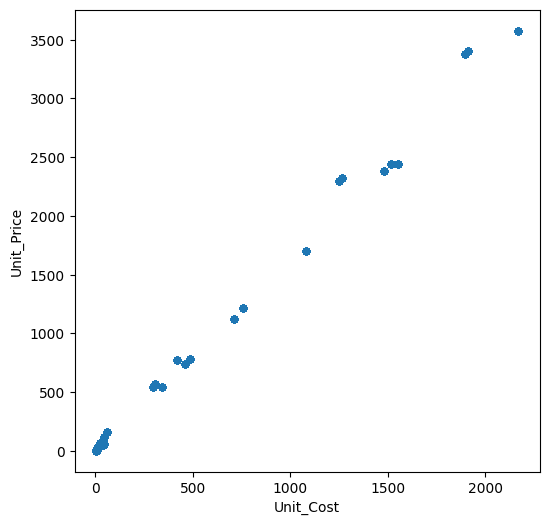

In [21]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

<Axes: xlabel='Profit', ylabel='Order_Quantity'>

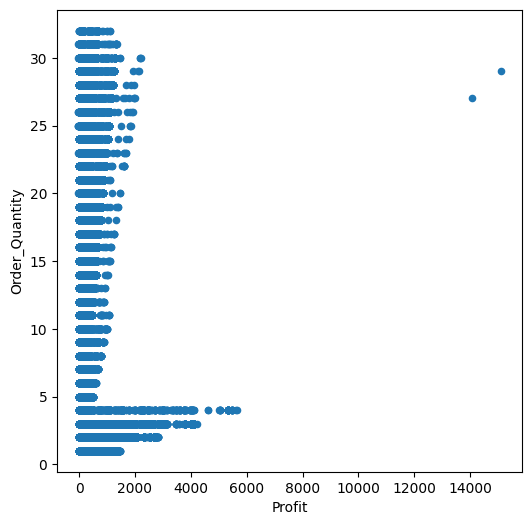

In [27]:
sales.plot(kind='scatter', x='Profit', y='Order_Quantity', figsize=(6,6))

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

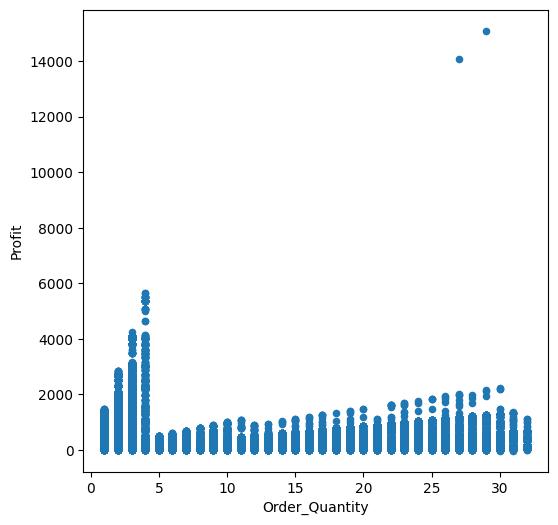

In [28]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

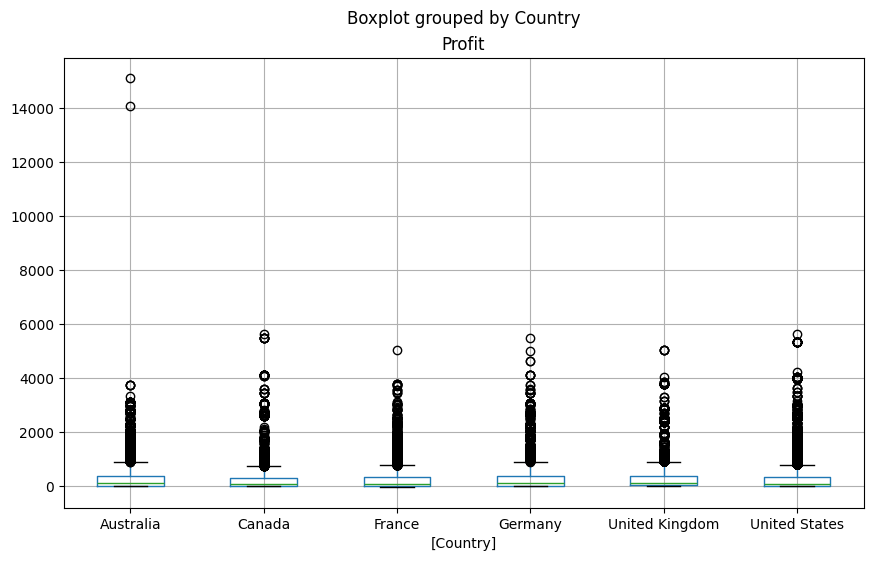

In [29]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

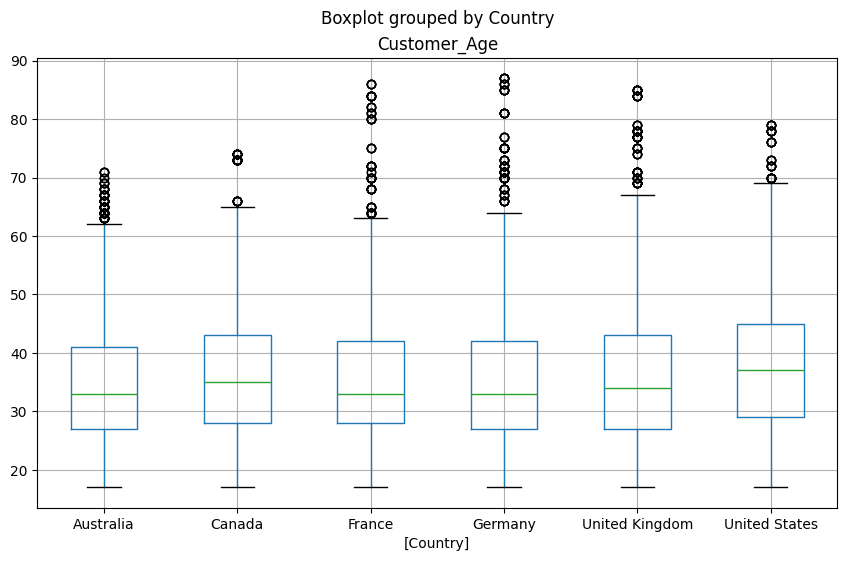

In [30]:
sales[['Customer_Age','Country']].boxplot(by='Country', figsize=(10,6))

In [ ]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `Calculated_Date` column

Use `Day`, `Month`, `Year` to create a `Date` column (`YYYY-MM-DD`).

In [40]:
sales['Calculated_Date'] = sales['Year'].astype(str) + '-' + sales['Month'].astype(str) + '-' + sales['Day'].astype(str)
sales['Calculated_Date'].head(5)

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [43]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

C:\Users\AZPC\AppData\Local\Temp\ipykernel_25280\223435626.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)


0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Parse your `Calculated_Date` column into a datetime object

In [ ]:
# your code goes here


In [41]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Show a <b>line plot</b> using `Calculated_Date` column as the x-axis and the count of sales as the y-axis.

<Axes: xlabel='Calculated_Date'>

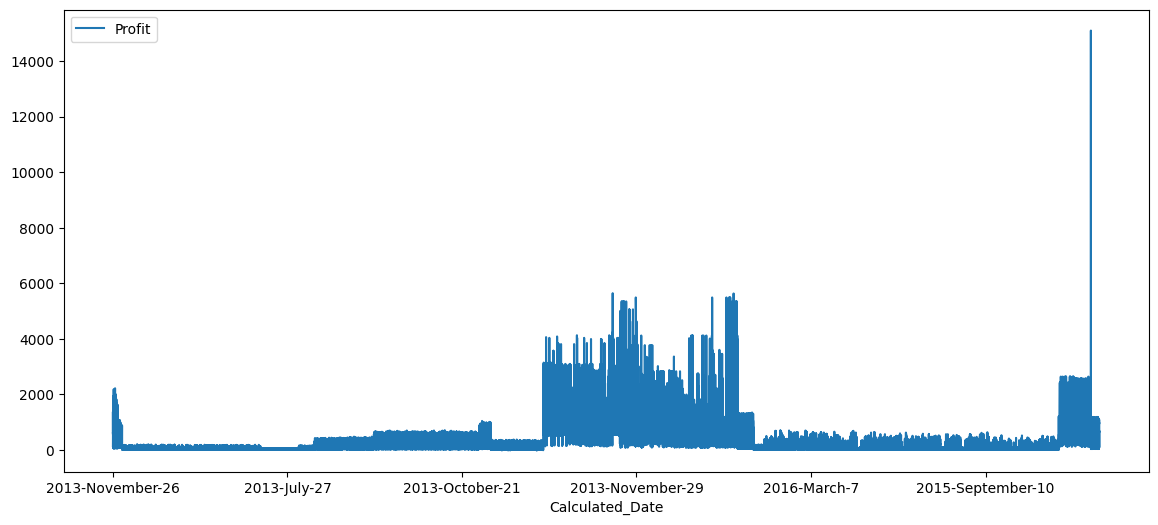

In [44]:
sales[['Calculated_Date', 'Profit']].plot(kind='line',x='Calculated_Date', y='Profit', figsize=(14,6))

<Axes: xlabel='Calculated_Date'>

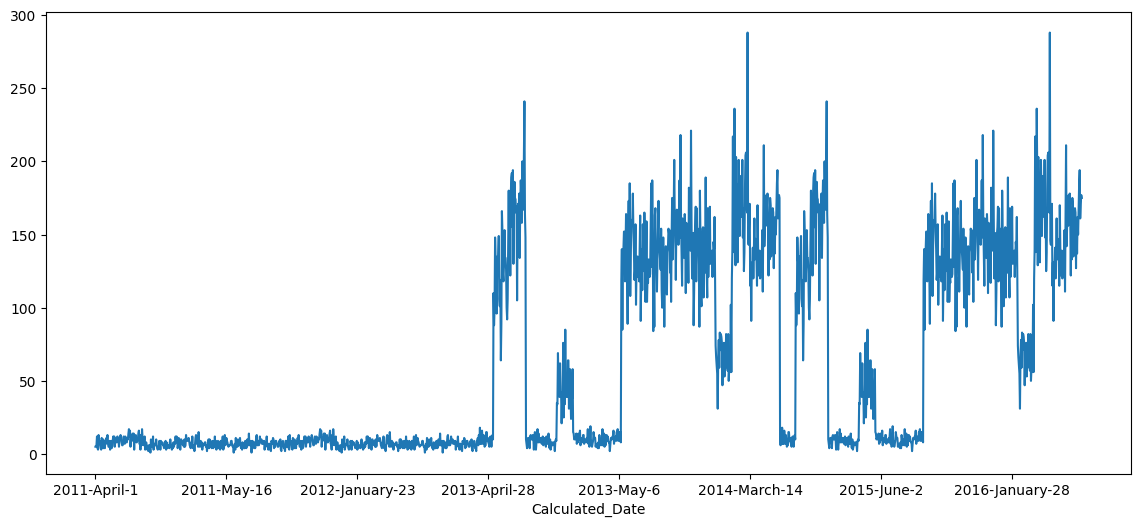

In [50]:
sales['Calculated_Date'].value_counts().sort_index(ascending= True).plot(kind='line', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [ ]:
# your code goes here


In [52]:
#sales['Revenue'] = sales['Revenue'] + 50

sales['Revenue'] += 50
sales['Revenue'].head() 

0    1050
1    1050
2    2501
3    2188
4     518
Name: Revenue, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [ ]:
# your code goes here


In [53]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [55]:
sales.loc[(sales['Country'] == 'Canada')].value_counts().shape[0]

14027

In [ ]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [59]:
sales.loc[(sales['Country'] == 'France'), ['State']].value_counts()



State            
Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

In [62]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

france_states

State
Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

In [60]:
# your code goes here


<Axes: xlabel='State'>

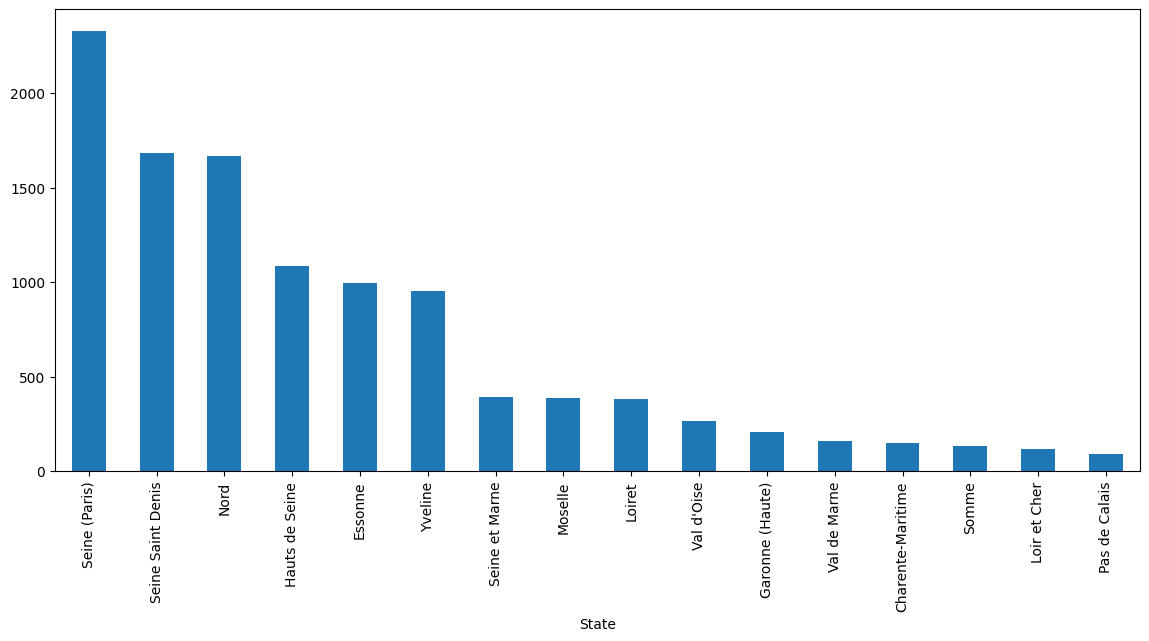

In [63]:
france_states.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [ ]:
# your code goes here


In [64]:
sales['Product_Category'].value_counts()

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

In [ ]:
# your code goes here


<Axes: ylabel='count'>

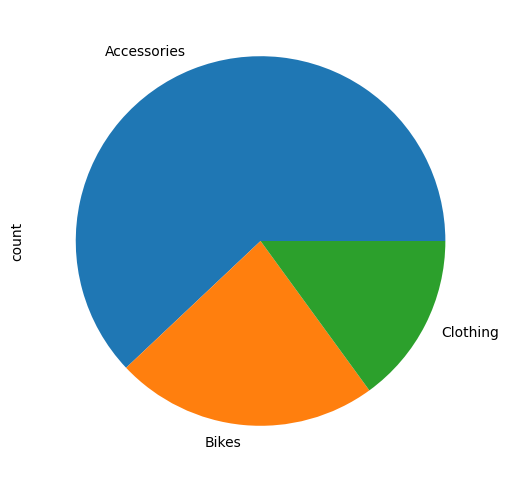

In [65]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [ ]:
# your code goes here


In [66]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

In [ ]:
# your code goes here


In [ ]:
accessories.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [ ]:
# your code goes here


In [ ]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Go ahead and show a <b>pie plot</b> with the results:

In [ ]:
# your code goes here


In [ ]:
bikes.plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

In [ ]:
# your code goes here


In [67]:
sales['Customer_Gender'].value_counts()

Customer_Gender
M    58312
F    54724
Name: count, dtype: int64

<Axes: xlabel='Customer_Gender'>

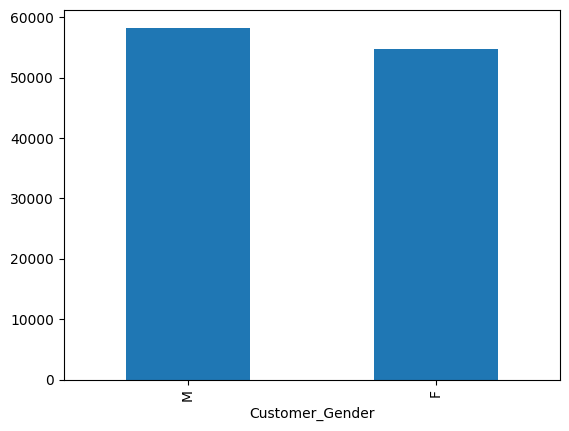

In [68]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [83]:
sales.loc[(sales['Revenue'] == 500) & (sales['Customer_Gender'] == 'M')].value_counts().shape[0]

9

In [79]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

9

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [85]:
sales["Revenue"].sort_values(ascending=True).head(5)

92235    102
80491    102
93369    102
85310    102
99239    102
Name: Revenue, dtype: int64

In [87]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58174,2015-July-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54169,2013-July-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14412,2011-July-8
59919,2011-03-20,20,March,2011,29,Young Adults (25-34),F,Germany,Bayern,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5485,8684,14269,2011-March-20
68671,2011-07-05,5,July,2011,26,Young Adults (25-34),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 56",4,2171,3578,5485,8684,14269,2011-July-5


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [89]:
sales.loc[sales['Revenue'] == max(sales['Revenue'])]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58174,2015-July-24


In [88]:
#sales.sort_values(['Revenue'], ascending=False).head(1)

cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58174,2015-July-24


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [90]:
sales.loc[sales['Revenue'] > 10000, ['Order_Quantity']].mean()

Order_Quantity    3.685393
dtype: float64

In [91]:
cond = sales['Revenue'] > 10_000

sales.loc[cond, 'Order_Quantity'].mean()

np.float64(3.6853932584269664)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [ ]:
# your code goes here


In [ ]:
cond = sales['Revenue'] < 10_000

sales.loc[cond, 'Order_Quantity'].mean()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [ ]:
# your code goes here


In [96]:
cond = (sales['Year'] == 2016) & ((sales['Month'] >= 'May') & (sales['Month'] <= 'May'))

sales.loc[cond].shape[0]

5015

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [ ]:
# your code goes here


In [94]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

12164

Show a grouped <b>box plot</b> per month with the profit values.

In [ ]:
# your code goes here


<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

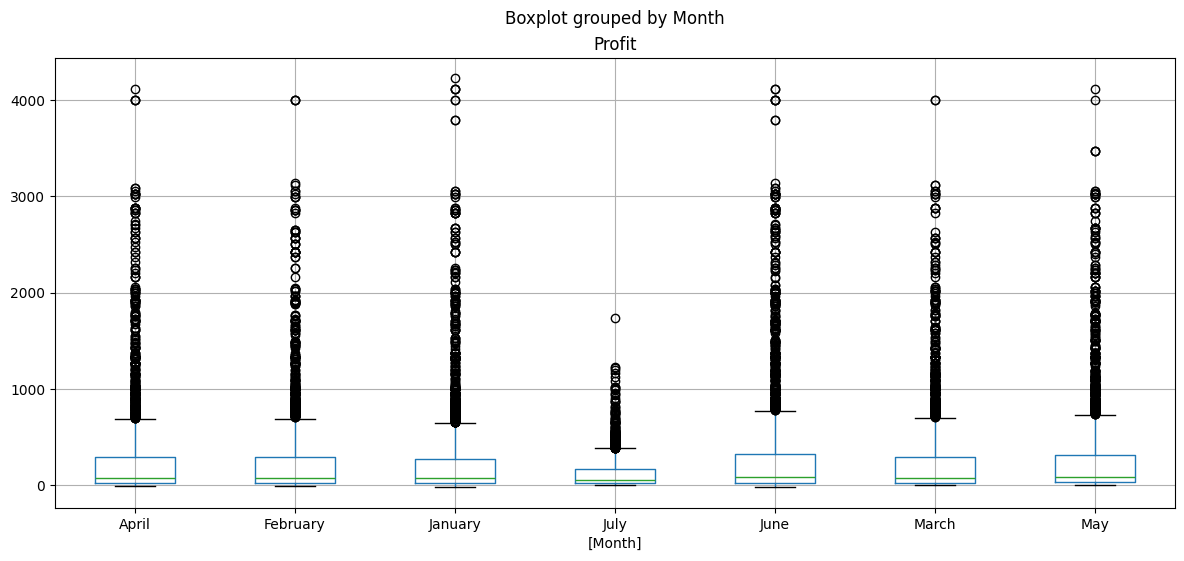

In [97]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [ ]:
Unit_Price_after_tax = sales['Unit_Price']  sales['Unit_Price'] * 7.2%

SyntaxError: invalid syntax (2667182470.py, line 1)

In [99]:
#sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072

sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

C:\Users\AZPC\AppData\Local\Temp\ipykernel_25280\88156556.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[128.64  128.64  128.64  ...  68.608  68.608  68.608]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)